## Case Background
The goal of this project is to conduct an in-depth analysis of the UEFA Champions League (UCL) using historical data from 1955 to 2023. By leveraging match performance and final results data, aiming to uncover patterns, trends, and insights that have shaped the tournament over the decades.

## Data Description
[The dataset here](https://www.kaggle.com/datasets/fardifaalam170041060/champions-league-dataset-1955-2023). It contains the following fields:

All-Time Performance Dataset
* **Team:** The team name
* **M:** Number of matches played
* **W:** Wins
* **D:** Draws
* **L:** Losses
* **Goals:** Goals scored (and possibly goals conceded)
* **Dif:** Goal difference (difference between goals scored and goals conceded)
* **Pt:** Total points accumulated by the team

UEFA Finals Dataset (1955-2023):
* **Season:** The season of the final
* **Country:** Country of the winning team
* **Winners:** The team that won the final
* **Score:** Final match score
* **Runners-up:** The team that lost the final
* **Venue:** Additional match details
* **Attendance:** Additional match details
* **Notes:** Additional match details

## Data Cleaning

In [5]:
import pandas as pd
df = pd.read_csv('UCL_AllTime_Performance_Table.csv')
df2 = pd.read_csv('UCL_Finals_1955-2023.csv') 


In [7]:
df.head()
df.dtypes
df2.head()
df2.dtypes

Season         object
Country        object
Winners        object
Score          object
Runners-up     object
Country.1      object
Venue          object
Attend­ance    object
Notes          object
dtype: object

In [9]:
# Checking for duplicates
df.duplicated().sum()
df2.duplicated().sum()

0

In [11]:
# Checking for missing values
df.isnull().sum()

# Checking for missing values
df2.isnull().sum()


Season          0
Country         0
Winners         0
Score           0
Runners-up      0
Country.1       0
Venue           0
Attend­ance     0
Notes          51
dtype: int64

In [13]:
# Renaming the columns 
df.columns = ['Rank', 'Team', 'Matches', 'Wins', 'Draws', 'Losses', 'Goals', 'Goal_Difference', 'Points']

# Renaming the columns
df2.columns = ['Season', 'Country', 'Winners', 'Score', 'Runners-up', 'Country_RunnersUp', 'Venue', 'Attendance', 'Notes']

# Filling the missing values in rank in order
df['Rank'] = range(1, len(df) + 1)

In [15]:
# Checking for the missing values again 
df.isnull().sum()

Rank               0
Team               0
Matches            0
Wins               0
Draws              0
Losses             0
Goals              0
Goal_Difference    0
Points             0
dtype: int64

In [17]:
# Split the "Goals" column into "Goals_Scored" and "Goals_Conceded"
df[['Goals_Scored', 'Goals_Conceded']] = df['Goals'].str.split(':', n=1, expand=True)

# Remove the trailing ':00' from 'Goals_Conceded'
df['Goals_Conceded'] = df['Goals_Conceded'].str.split(':').str[0]

# Converting to integer type
df['Goals_Scored'] = df['Goals_Scored'].astype(int)
df['Goals_Conceded'] = df['Goals_Conceded'].astype(int)

# Dropping the original "Goals" column
df.drop(columns=['Goals'], inplace=True)



In [19]:
# Filling the missing values in Notes to indicate the game was finished in full-time
df2['Notes'] = df2['Notes'].fillna('Match was won during full time')

In [21]:
# Checking for the missing values again 
df.isnull().sum()

Rank               0
Team               0
Matches            0
Wins               0
Draws              0
Losses             0
Goal_Difference    0
Points             0
Goals_Scored       0
Goals_Conceded     0
dtype: int64

In [23]:
df2.Attendance

0      38,239
1     124,000
2      67,000
3      72,000
4     127,621
       ...   
64     63,272
65          0
66     14,110
67     75,000
68     71,412
Name: Attendance, Length: 69, dtype: object

In [612]:
# Converting Attendance to numeric because its an object
#df2.Attendance = pd.to_numeric(df2.Attendance, errors='coerce')

# Checking for outliers in the attendance 
#df2[df2.Attendance == 0].shape[0]

# Dropping row with 0 attendance
#df2.Attendance = df2[df2.Attendance != 0]

In [476]:
# Checking to see if the row was dropped
#df2[df2.Attendance == 0].shape[0]

1

## Exploratory Data Analysis

In [25]:
df.describe()

,Rank,Matches,Wins,Draws,Losses,Goal_Difference,Points,Goals_Scored,Goals_Conceded
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,177.500000,33.254237,13.039548,7.169492,13.039548,0.000000,0.000000,48.878531,19.929379
std,102.335233,61.581865,31.468472,13.729255,18.669137,52.566267,52.566267,110.852194,15.115723
min,1.000000,2.000000,0.000000,0.000000,0.000000,-97.000000,-97.000000,0.000000,0.000000
25%,89.250000,4.000000,0.000000,0.000000,2.000000,-14.000000,-14.000000,4.000000,7.000000
50%,177.500000,8.000000,2.000000,2.000000,5.000000,-5.000000,-5.000000,10.000000,14.500000
75%,265.750000,31.500000,9.000000,6.000000,14.000000,0.000000,0.000000,41.500000,29.000000
max,354.000000,486.000000,291.000000,85.000000,110.000000,533.000000,533.000000,1076.000000,59.000000


In [27]:
df2.describe()

,Season,Country,Winners,Score,Runners-up,Country_RunnersUp,Venue,Attendance,Notes
count,69,69,69,69,69,69,69,69,69
unique,68,11,23,14,36,14,34,66,4
top,1973–74,Spain,Real Madrid,1–0,Juventus,Italy,"Wembley Stadium, London, England","70,000",Match was won during full time
freq,2,19,14,19,7,17,7,3,51


### Wins by Teams 

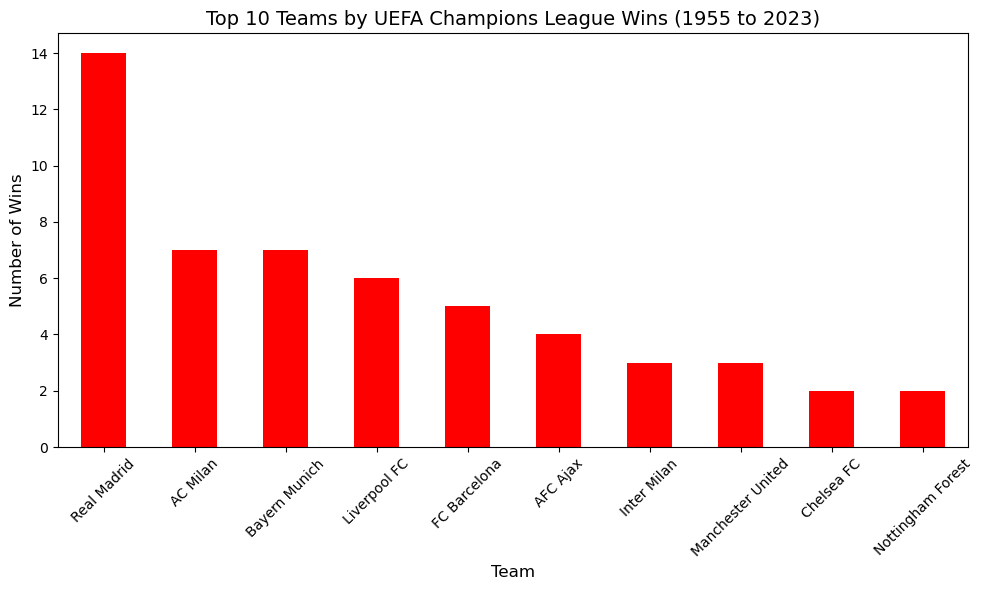

In [75]:
import matplotlib.pyplot as plt

# Counting occurrences of winners
winners_count = df2['Winners'].value_counts()

# Plot the top 10 winning teams
winners_count.head(10).plot(kind='bar', figsize=(10, 6), color='red')

# Adding title and axis labels
plt.title('Top 10 Teams by UEFA Champions League Wins (1955 to 2023)', fontsize=14)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)

# Rotating the x-axis
plt.xticks(rotation=45)

# Adjusting the layout
plt.tight_layout()

# Displaying
plt.show()

### Wins by Countries

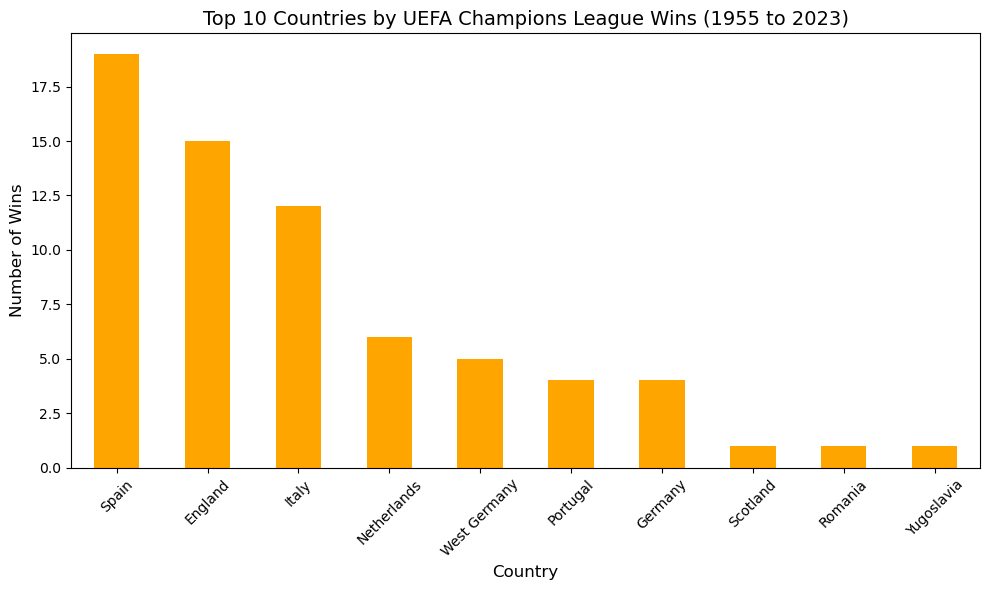

In [77]:
# Counting occurrences of wins by country
country_wins = df2['Country'].value_counts()

# Plotting the top 10 countries by wins
country_wins.head(10).plot(kind='bar', figsize=(10, 6), color='orange')

# Adding title and axis labels
plt.title('Top 10 Countries by UEFA Champions League Wins (1955 to 2023)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)

# Rotating the x-axis
plt.xticks(rotation=45)

# Adjusting the layout
plt.tight_layout()

# Displaying
plt.show()